In [14]:
# import needed libraries 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [110]:
# collect data
df = pd.read_csv('callisto_example_data.csv')
df.sent_date = pd.to_datetime(df.sent_date)
df['sent_month'] = df.sent_date.dt.month
df['response_time_hours'] = df.response_time / 3600

# custom percentile function to assist
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

# custom function to help calculate percentage of a particular status
def status_to_percent(status):
    def status_to_percent_(x):
        return sum(x == status) / len(x)
    # take out white space and make lower case
    stripped = status.replace(" ", "")
    stripped = stripped.lower()
    status_to_percent_.__name__ = '%s_percentage' % stripped
    return status_to_percent_

df_by_month = df.groupby('sent_month').agg({
    'hotel':['count'],
    'room_night_count':[percentile(10), percentile(90), 'median'],
    'attendee_count':[percentile(10), percentile(90), 'median'],
    'status': [
        status_to_percent('Declined'),
        status_to_percent('Turned Down'),
        status_to_percent('Submitted Proposal'),
        status_to_percent('Awarded'),
        status_to_percent('Withdrawn'),
        status_to_percent('Awaiting Proposal'),
        status_to_percent('No Response'),
        status_to_percent('Cancelled')
    ]})

In [97]:
df.head(3)

,hotel,status,sent_date,room_night_count,response_time,attendee_count,sent_month,response_time_hours
0,hotel_c,Declined,2015-06-07,198,3284,32,6,0.912222
1,hotel_c,Declined,2015-01-21,1220,11482,460,1,3.189444
2,hotel_c,Declined,2015-06-19,487,485,218,6,0.134722


In [98]:
df_by_month.head(3)

hotel attendee_count                           room_night_count  \
           count  percentile_10 percentile_90        mean    percentile_10   
sent_month                                                                   
1            259           18.0         700.0  242.756757             25.4   
2            276           22.0         800.0  309.177536             37.5   
3            301           25.0         900.0  359.013289             40.0   

                                      
           percentile_90        mean  
sent_month                            
1                 1515.4  520.803089  
2                 1985.0  676.695652  
3                 2028.0  815.418605

In [68]:
#limit to just one hotel
df = df[df.hotel == 'hotel_a']

Text(0,0.5,'Count')

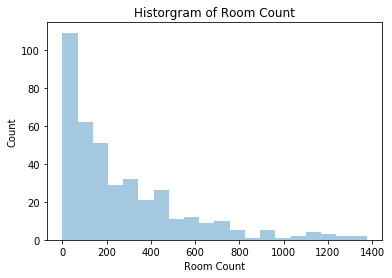

In [69]:
sns.distplot(df.room_night_count, kde=False, bins=20 )
plt.title('Historgram of Room Count')
plt.xlabel('Room Count')
plt.ylabel('Count')

Text(0,0.5,'Count')

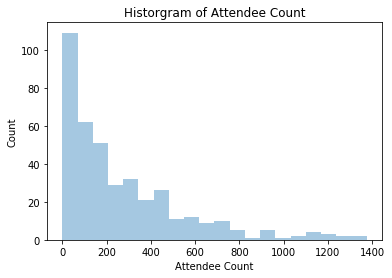

In [70]:
sns.distplot(df.room_night_count, kde=False, bins=20)
plt.title('Historgram of Attendee Count')
plt.xlabel('Attendee Count')
plt.ylabel('Count')

Text(0,0.5,'Count')

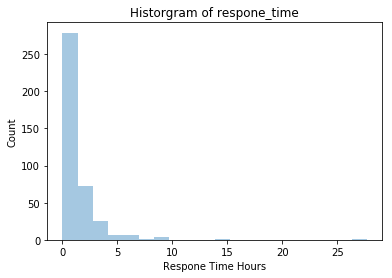

In [71]:
sns.distplot(df.response_time_hours, kde=False, bins=20)
plt.title('Historgram of respone_time')
plt.xlabel('Respone Time Hours')
plt.ylabel('Count')

Text(0,0.5,'Room Count')

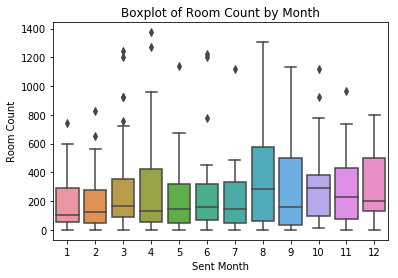

In [72]:
sns.boxplot(data=df, x='sent_month', y='room_night_count')
plt.title('Boxplot of Room Count by Month')
plt.xlabel('Sent Month')
plt.ylabel('Room Count')

Text(0,0.5,'Attendee Count')

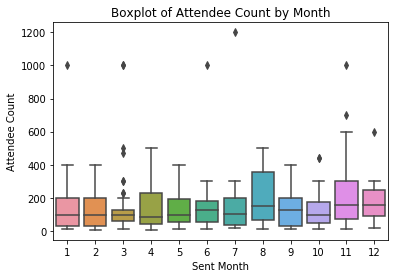

In [73]:
sns.boxplot(data=df, x='sent_month', y='attendee_count')
plt.title('Boxplot of Attendee Count by Month')
plt.xlabel('Sent Month')
plt.ylabel('Attendee Count')

Text(0,0.5,'Response Time Hours')

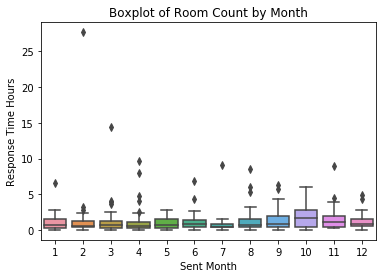

In [74]:
sns.boxplot(data=df, x='sent_month', y='response_time_hours')
plt.title('Boxplot of Room Count by Month')
plt.xlabel('Sent Month')
plt.ylabel('Response Time Hours')

Text(9.925,0.5,'Resonse Time in Hours')

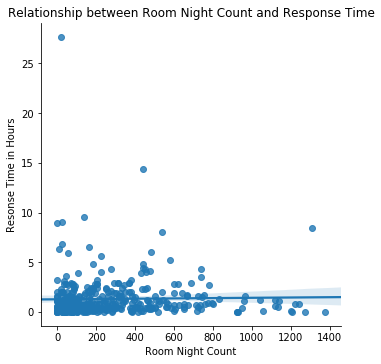

In [76]:
sns.lmplot(data=df, x='room_night_count', y='response_time_hours')
plt.title('Relationship between Room Night Count and Response Time')
plt.xlabel('Room Night Count')
plt.ylabel('Resonse Time in Hours')

(0, 319.89999999999998)

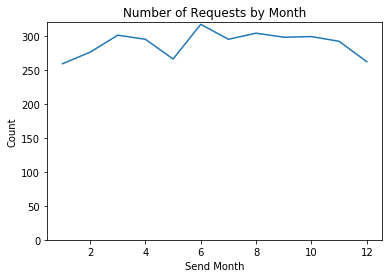

In [89]:
plt.plot(df_by_month['hotel']['count'])
plt.title('Number of Requests by Month')
plt.xlabel('Send Month')
plt.ylabel('Count')
plt.ylim(0,)

(0, 2320.1000000000026)

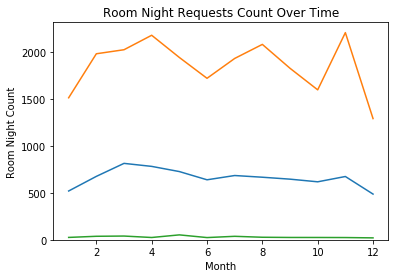

In [102]:
plt.plot(df_by_month['room_night_count']['median'])
plt.plot(df_by_month['room_night_count']['percentile_90'])
plt.plot(df_by_month['room_night_count']['percentile_10'])
plt.title('Room Night Requests Count Over Time')
plt.xlabel('Month')
plt.ylabel('Room Night Count')
plt.ylim(0,)

(0, 1047.0000000000007)

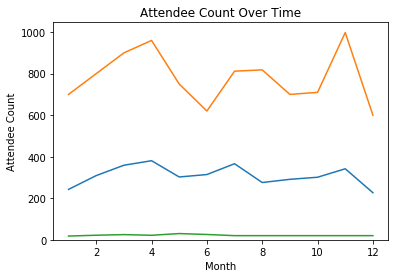

In [104]:
plt.plot(df_by_month['attendee_count']['median'])
plt.plot(df_by_month['attendee_count']['percentile_90'])
plt.plot(df_by_month['attendee_count']['percentile_10'])
plt.title('Attendee Count Over Time')
plt.xlabel('Month')
plt.ylabel('Attendee Count')
plt.ylim(0,)